<a href="https://colab.research.google.com/github/zakkaizzatur/Data-Related-Projects/blob/main/ASL_Alphabet_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASL Alphabet Image Classification Project**

---

## Konteks
Tidak semua orang dapat merasakan komunikasi dengan menggunakan lisan. Bagi sebagian orang, bahasa isyarat adalah solusi yang tepat bagi mereka untuk dapat terus berkomunikasi dengan orang lain. 

Salah satu yang menjadi tantangan dalam penggunaan bahasa isyarat adalah tidak semua orang mengerti akan hal tersebut. Untuk mempelajarinya pun, dibutuhkan waktu yang tidak sebentar. Berdasarkan sebuah [artikel](https://www.handspeak.com/learn/index.php?id=61), dibutuhkan waktu 2-3 tahun sampai seseorang dapat fasih dalam menggunakan bahasa isyarat.

Oleh karena itu, riset dan penelitian dalam proses *translate* bahasa isyarat ke dalam bahasa yang lebih mudah umum digunakan cukup banyak. Salah satu cara yang dapat digunakan untuk melakukan hal tersebut adalah mengaplikasikan *machine learning* untuk mengartikan visual berupa gambar atau video dari bahasa isyarat tersebut.

---

## Dataset
Pada *notebook* ini, dataset yang digunakan berasal dari Kaggle yang dapat diakses pada link berikut: [dataset](https://www.kaggle.com/grassknoted/asl-alphabet)

Dataset ini berisi 29 kategori yang tiap kategorinya berisi 3000 gambar tangan dalam berbagai kondisi. Tiap kategori merepresentasikan satu huruf dalam abjad. Terdapat juga 3 kategori tambahan yaitu karakter delete, space, dan nothing(kosong)

---
##Proses Klasifikasi

Proses klasifikasi yang akan dilakukan termasuk dalam klasifikasi gambar. Langkah-langkah yang dilakukan pada project ini adalah sebagai berikut:


1.   Eksplorasi data
2.   Konversi gambar menjadi matriks dan membagi data menjadi data train dan data validasi
3.   Pembuatan model DNN dengan menggunakan layer MaxPooling 2D dan Dropout
4.   Pelatihan model dan pengecekan akurasi dengan menggunakan data validasi








##Eksplorasi data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import os
os.environ['KAGGLE_USERNAME'] = 'username'
os.environ['KAGGLE_KEY'] = 'kagglekey'

In [3]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:09<00:00, 90.7MB/s]
100% 1.03G/1.03G [00:09<00:00, 114MB/s] 


In [4]:
!unzip -q asl-alphabet.zip -d .

In [5]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 
           'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
           'W', 'X', 'Y', 'Z', 'nothing', 'space', 'del']

In [20]:
train_data = '/content/asl_alphabet_train/asl_alphabet_train'
test_data = '/content/asl_alphabet_test/asl_alphabet_test'

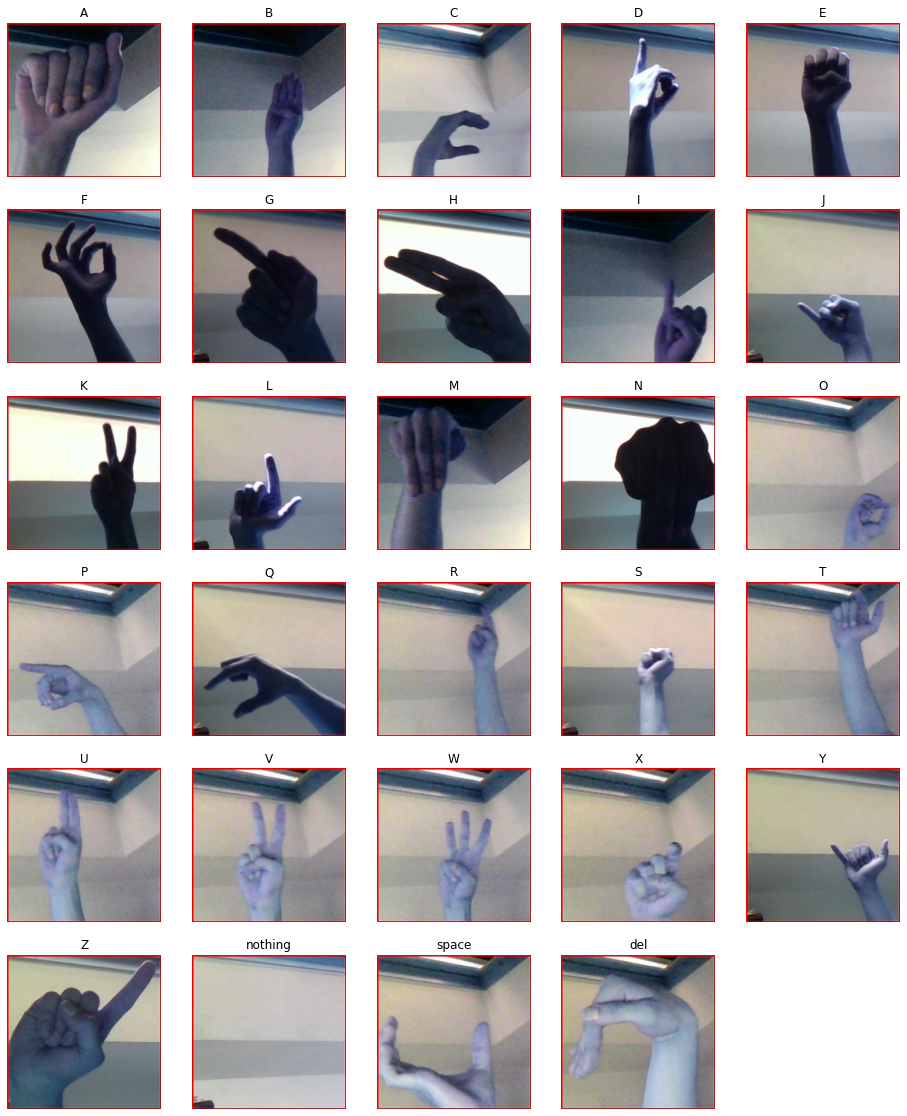

In [9]:
import cv2
from glob import glob

def plot_one_sample_of_each(base_path):
    cols = 5
    rows = int(np.ceil(len(class_names) / cols))
    fig = plt.figure(figsize=(16, 20))
    
    for i in range(len(class_names)):
        cls = class_names[i]
        img_path = base_path + '/' + cls + '/**'
        path_contents = glob(img_path)
    
        imgs = random.sample(path_contents, 1)

        sp = plt.subplot(rows, cols, i + 1)
        plt.imshow(cv2.imread(imgs[0]))
        plt.title(cls)
        sp.axis('off')

    plt.show()
    return

plot_one_sample_of_each(train_data)

##Konversi gambar menjadi matriks dan membagi data menjadi data train dan data validasi

In [10]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [11]:
datagen = ImageDataGenerator(rescale=1./255,
                    samplewise_center=True,
                    samplewise_std_normalization=True,
                    validation_split = 0.2) #validation_split digunakan untuk membagi data train dan validation dengan proporsi 8:2

In [12]:
train_generator = datagen.flow_from_directory(
    train_data, #direktori data utama
    target_size = (64,64), #mengubah resolusi menjadi (64,64)
    class_mode = 'categorical', #mode kelas categorical karena terdapat 3 kelas
    batch_size = 32,
    subset = 'training' #mengidentifikasi data yang digunakan sebagai training
)

validation_generator = datagen.flow_from_directory(
    train_data,
    target_size = (64,64),
    class_mode = 'categorical',
    batch_size = 32,
    subset = 'validation' #mengidentifikasi data yang digunakan sebagai validasi
)

Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


##Pelatihan model dan pengecekan akurasi dengan menggunakan data validasi

Model dibuat menggunakan DNN dengan menggunakan layer MaxPooling 2D dan Dropout

In [13]:
from keras.callbacks import EarlyStopping 
early_stop = EarlyStopping(monitor='loss', patience=2)

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (64,64,3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(64, (2, 2), activation = 'relu'),
    tf.keras.layers.Conv2D(64, (2, 2), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(128, (2, 2), activation = 'relu'),
    tf.keras.layers.Conv2D(128, (2, 2), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(256, (2, 2), activation = 'relu'),
    tf.keras.layers.Conv2D(256, (2, 2), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(29, activation = 'softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
    epochs = 10, validation_steps = 5,callbacks=[early_stop],validation_data=validation_generator, use_multiprocessing=True)


Epoch 1/50
2175/2175 [==============================] - 125s 43ms/step - loss: 1.3942 - accuracy: 0.5632 - val_loss: 0.7952 - val_accuracy: 0.7563
Epoch 2/50
2175/2175 [==============================] - 102s 47ms/step - loss: 0.3827 - accuracy: 0.8732 - val_loss: 0.5479 - val_accuracy: 0.8125
Epoch 3/50
2175/2175 [==============================] - 93s 43ms/step - loss: 0.2650 - accuracy: 0.9150 - val_loss: 0.8792 - val_accuracy: 0.7437
Epoch 4/50
2175/2175 [==============================] - 97s 44ms/step - loss: 0.2274 - accuracy: 0.9299 - val_loss: 0.4011 - val_accuracy: 0.8625
Epoch 5/50
2175/2175 [==============================] - 93s 43ms/step - loss: 0.2113 - accuracy: 0.9390 - val_loss: 0.7114 - val_accuracy: 0.8375
Epoch 6/50
2175/2175 [==============================] - 94s 43ms/step - loss: 0.2151 - accuracy: 0.9394 - val_loss: 0.4684 - val_accuracy: 0.8875
Epoch 7/50
2175/2175 [==============================] - 93s 43ms/step - loss: 0.2270 - accuracy: 0.9389 - val_loss: 0.5183

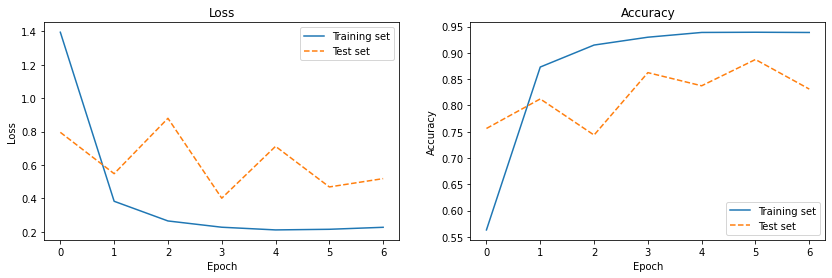

In [15]:

hist=history
loss = hist.history['loss']
val_loss = hist.history['val_loss']

accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss, label='Training set')
plt.plot(val_loss, label='Test set', linestyle='--')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(accuracy, label='Training set')
plt.plot(val_accuracy, label='Test set', linestyle='--')
plt.legend()

plt.show()